In [24]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
# folder_name = 'Capstone Data'

# # Function to search for the folder recursively
# def find_folder(start_dir, folder_name):
#     for root, dirs, files in os.walk(start_dir):
#         if folder_name in dirs:
#             folder_path = os.path.join(root, folder_name)
#             print(f"The path of '{folder_name}' is: {folder_path}")
        
# # Start the search from the root directory (you can specify a different directory)
# start_directory = '/'

# find_folder(start_directory, folder_name)

In [26]:
all_mines = pd.read_csv('/Users\\austi\\Documents\\Capstone\\Working\\For real\\Capstone Data\\all_mines_no_filter_with_precip.csv')

all_mines.head(15)

C:\Users\austi\AppData\Local\Temp\ipykernel_23916\4216978923.py:1: DtypeWarning: Columns (6,16,18,19,20,21,35,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  all_mines = pd.read_csv('/Users\\austi\\Documents\\Capstone\\Working\\For real\\Capstone Data\\all_mines_no_filter_with_precip.csv')


,Unnamed: 0,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,...,Number_company_to_permit_id,edit_month,edit_year,permit_weekday,permit_approval_month,permit_approval_year,permit_application_year,WaterQuality,Max Temperature,Precipitation
0,0,B & C ENERGY INC,2023-07-01,45.0,8640180,00000000000000001112,ky,0.031113,0.623011,0.059563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044621,298.399994,3.600000
1,1,RIDNER COAL CO INC,2023-07-01,4.0,9180010,00000000000000001d20,ky,0.031869,0.698788,0.039705,...,1.0,7.0,2000.0,Tuesday,6.0,1984,NaT,-0.455063,302.299988,15.300000
2,2,HERBERT WELLS,2023-07-01,2.0,0320080,000000000000000020c7,ky,0.032205,0.539393,0.055222,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.087868,297.799988,7.500000
3,3,MOUNT VICTORY COAL CO INC,2023-07-01,16.0,404774X,00000000000000003095,ky,0.033029,0.735718,0.038324,...,1.0,7.0,2000.0,Monday,6.0,1975,NaT,-0.525961,302.600006,11.400000
4,4,EVERGREEN MINING INC,2023-07-01,30.0,8260501,0000000000000000086a,ky,0.030702,0.743186,0.033933,...,1.0,5.0,2004.0,Monday,3.0,2001,NaT,-0.402627,301.700012,16.500000
5,5,GLOBAL ENERGY GROUP LLC,2023-07-01,73.0,8260599,000000000000000008a4,ky,0.030102,0.673109,0.048175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.570483,301.700012,16.500000
6,6,BER COAL LLC,2023-07-01,6.0,8260670,000000000000000008bf,ky,0.032317,0.463962,0.098910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.504517,301.700012,16.500000
7,7,ABBY COAL COMPANY,2023-07-01,12.0,8610283,00000000000000000f90,ky,0.029565,0.740508,0.035389,...,1.0,7.0,2000.0,Wednesday,4.0,1985,NaT,-0.156103,302.600006,16.700001
8,8,TRINITY COAL CO INC,2023-07-01,12.0,0260103,0000000000000000201c,ky,0.032591,0.509787,0.166916,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.498674,301.899994,15.800000
9,9,HERMITAGE COAL CO INC,2023-07-01,2.0,643677X,000000000000000003af,ky,0.033055,0.732339,0.035516,...,1.0,7.0,2000.0,Thursday,11.0,1977,NaT,-0.408518,298.700012,8.900000


In [27]:
all_mines.columns

Index(['Unnamed: 0', 'Company', 'start_date', 'Observations', 'orig_perm_id',
       'mine_id', 'State', 'water', 'trees', 'grass', 'flooded_vegetation',
       'crops', 'shrub_and_scrub', 'built', 'bare', 'snow_and_ice', 'company',
       'coalmine_op_status', 'mine_name', 'permit_id', 'national_id',
       'coal_bed_names', 'inspectable_unit_status', 'post_smcra',
       'reported_area', 'permit_application_type', 'area_mine', 'contour',
       'mountaintop', 'steep_slope', 'highwall', 'auger', 'contact',
       'Number_company_to_permit_id', 'edit_month', 'edit_year',
       'permit_weekday', 'permit_approval_month', 'permit_approval_year',
       'permit_application_year', 'WaterQuality', 'Max Temperature',
       'Precipitation'],
      dtype='object')

In [28]:
columns_to_drop = ['Unnamed: 0', 'company']
all_mines = all_mines.drop(columns = columns_to_drop)


all_mines.columns

Index(['Company', 'start_date', 'Observations', 'orig_perm_id', 'mine_id',
       'State', 'water', 'trees', 'grass', 'flooded_vegetation', 'crops',
       'shrub_and_scrub', 'built', 'bare', 'snow_and_ice',
       'coalmine_op_status', 'mine_name', 'permit_id', 'national_id',
       'coal_bed_names', 'inspectable_unit_status', 'post_smcra',
       'reported_area', 'permit_application_type', 'area_mine', 'contour',
       'mountaintop', 'steep_slope', 'highwall', 'auger', 'contact',
       'Number_company_to_permit_id', 'edit_month', 'edit_year',
       'permit_weekday', 'permit_approval_month', 'permit_approval_year',
       'permit_application_year', 'WaterQuality', 'Max Temperature',
       'Precipitation'],
      dtype='object')

In [29]:
all_mines

,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,flooded_vegetation,...,Number_company_to_permit_id,edit_month,edit_year,permit_weekday,permit_approval_month,permit_approval_year,permit_application_year,WaterQuality,Max Temperature,Precipitation
0,B & C ENERGY INC,2023-07-01,45.0,8640180,00000000000000001112,ky,0.031113,0.623011,0.059563,0.032779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044621,298.399994,3.60
1,RIDNER COAL CO INC,2023-07-01,4.0,9180010,00000000000000001d20,ky,0.031869,0.698788,0.039705,0.029274,...,1.0,7.0,2000.0,Tuesday,6.0,1984,NaT,-0.455063,302.299988,15.30
2,HERBERT WELLS,2023-07-01,2.0,0320080,000000000000000020c7,ky,0.032205,0.539393,0.055222,0.030944,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.087868,297.799988,7.50
3,MOUNT VICTORY COAL CO INC,2023-07-01,16.0,404774X,00000000000000003095,ky,0.033029,0.735718,0.038324,0.029872,...,1.0,7.0,2000.0,Monday,6.0,1975,NaT,-0.525961,302.600006,11.40
4,EVERGREEN MINING INC,2023-07-01,30.0,8260501,0000000000000000086a,ky,0.030702,0.743186,0.033933,0.027343,...,1.0,5.0,2004.0,Monday,3.0,2001,NaT,-0.402627,301.700012,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,STUMP COAL COMPANY INC,2021-07-01,1.5,2985253,00000000000000002fbe,NaN,0.027484,0.730087,0.032807,0.026845,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.351156,301.599991,2.30
38658,ELKHORN EAGLE MINING COMPANY INC,2021-07-01,1.0,2985273,00000000000000002fca,NaN,0.029705,0.730464,0.035289,0.027582,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.370377,301.449997,0.95
38659,JEROLD AND JEFFREY COAL COMPANY INC,2021-07-01,1.5,2985288,00000000000000002fd2,NaN,0.026915,0.738387,0.041519,0.026679,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.377304,301.449997,0.95
38660,LITTLE HACKNEY CREEK COAL CO,2021-07-01,1.5,2985319,00000000000000002fdc,NaN,0.027767,0.748742,0.030551,0.028099,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.383537,301.250000,0.20


In [30]:
all_mines.dtypes

Company                         object
start_date                      object
Observations                   float64
orig_perm_id                    object
mine_id                         object
State                           object
water                          float64
trees                          float64
grass                          float64
flooded_vegetation             float64
crops                          float64
shrub_and_scrub                float64
built                          float64
bare                           float64
snow_and_ice                   float64
coalmine_op_status             float64
mine_name                       object
permit_id                       object
national_id                     object
coal_bed_names                  object
inspectable_unit_status        float64
post_smcra                     float64
reported_area                  float64
permit_application_type        float64
area_mine                      float64
contour                  

In [31]:
for column_name, dtype in all_mines.dtypes.items():
    if dtype == 'object':
        column_values = all_mines[column_name]
        
        num_unique_values = column_values.nunique()
        
        print(f'Column: {column_name}')
        print(f'Number of Unique Values: {num_unique_values}\n')
        value_counts = column_values.value_counts()
        print(value_counts)
        print('-------------------------------------------\n')


Column: Company
Number of Unique Values: 3065

Company
REVELATION ENERGY LLC                 525
MARTIN COUNTY COAL CORPORATION        389
LCC KENTUCKY LLC                      362
NALLY & HAMILTON ENTERPRISES INC      320
ICG HAZARD LLC                        318
                                     ... 
PERRY AND HYLTON, INCORPORATED          1
ILLUSION COAL COMPANY, INC.             1
KANAWHA COAL LLC                        1
REBEL COAL CO., INC.                    1
FARMERS CONSTRUCTION COMPANY, INC.      1
Name: count, Length: 3065, dtype: int64
-------------------------------------------

Column: start_date
Number of Unique Values: 4

start_date
2019-07-01    9995
2021-07-01    9702
2017-07-01    9597
2023-07-01    9368
Name: count, dtype: int64
-------------------------------------------

Column: orig_perm_id
Number of Unique Values: 8860

orig_perm_id
0268001    24
8970346    24
0130182    24
0070128    24
2667000    24
           ..
O000781     1
O000884     1
O002782     1
O0

In [32]:
columns_to_encode = ['Company', 'coal_bed_names', 
                     'State', 'permit_weekday', 'permit_approval_year']

# columns_to_encode = ['Company', 'mine_name', 'coal_bed_names', 
#                      'State', 'permit_weekday', 'permit_approval_year']

all_mines_encoded = pd.get_dummies(all_mines, columns=columns_to_encode)

all_mines_encoded

,start_date,Observations,orig_perm_id,mine_id,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,...,permit_approval_year_2010,permit_approval_year_2011,permit_approval_year_2012,permit_approval_year_2013,permit_approval_year_2014,permit_approval_year_2015,permit_approval_year_2016,permit_approval_year_2017,permit_approval_year_2018,permit_approval_year_NaT
0,2023-07-01,45.0,8640180,00000000000000001112,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,...,False,False,False,False,False,False,False,False,False,False
1,2023-07-01,4.0,9180010,00000000000000001d20,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,...,False,False,False,False,False,False,False,False,False,False
2,2023-07-01,2.0,0320080,000000000000000020c7,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,...,False,False,False,False,False,False,False,False,False,False
3,2023-07-01,16.0,404774X,00000000000000003095,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,...,False,False,False,False,False,False,False,False,False,False
4,2023-07-01,30.0,8260501,0000000000000000086a,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,2021-07-01,1.5,2985253,00000000000000002fbe,0.027484,0.730087,0.032807,0.026845,0.036434,0.035243,...,False,False,False,False,False,False,False,False,False,False
38658,2021-07-01,1.0,2985273,00000000000000002fca,0.029705,0.730464,0.035289,0.027582,0.032840,0.038326,...,False,False,False,False,False,False,False,False,False,False
38659,2021-07-01,1.5,2985288,00000000000000002fd2,0.026915,0.738387,0.041519,0.026679,0.033050,0.036183,...,False,False,False,False,False,False,False,False,False,False
38660,2021-07-01,1.5,2985319,00000000000000002fdc,0.027767,0.748742,0.030551,0.028099,0.036952,0.026954,...,False,False,False,False,False,False,False,False,False,False


In [33]:
for column_name in all_mines_encoded.columns:
    if all_mines_encoded[column_name].dtype == 'int64':
        all_mines_encoded[column_name] = all_mines_encoded[column_name].astype('float32')
        
all_mines_encoded

,start_date,Observations,orig_perm_id,mine_id,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,...,permit_approval_year_2010,permit_approval_year_2011,permit_approval_year_2012,permit_approval_year_2013,permit_approval_year_2014,permit_approval_year_2015,permit_approval_year_2016,permit_approval_year_2017,permit_approval_year_2018,permit_approval_year_NaT
0,2023-07-01,45.0,8640180,00000000000000001112,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,...,False,False,False,False,False,False,False,False,False,False
1,2023-07-01,4.0,9180010,00000000000000001d20,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,...,False,False,False,False,False,False,False,False,False,False
2,2023-07-01,2.0,0320080,000000000000000020c7,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,...,False,False,False,False,False,False,False,False,False,False
3,2023-07-01,16.0,404774X,00000000000000003095,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,...,False,False,False,False,False,False,False,False,False,False
4,2023-07-01,30.0,8260501,0000000000000000086a,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,2021-07-01,1.5,2985253,00000000000000002fbe,0.027484,0.730087,0.032807,0.026845,0.036434,0.035243,...,False,False,False,False,False,False,False,False,False,False
38658,2021-07-01,1.0,2985273,00000000000000002fca,0.029705,0.730464,0.035289,0.027582,0.032840,0.038326,...,False,False,False,False,False,False,False,False,False,False
38659,2021-07-01,1.5,2985288,00000000000000002fd2,0.026915,0.738387,0.041519,0.026679,0.033050,0.036183,...,False,False,False,False,False,False,False,False,False,False
38660,2021-07-01,1.5,2985319,00000000000000002fdc,0.027767,0.748742,0.030551,0.028099,0.036952,0.026954,...,False,False,False,False,False,False,False,False,False,False


In [34]:
object_columns = all_mines_encoded.select_dtypes(include=['object'])

all_mines_encoded = all_mines_encoded.drop(columns=object_columns.columns)

all_mines_encoded

,Observations,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,...,permit_approval_year_2010,permit_approval_year_2011,permit_approval_year_2012,permit_approval_year_2013,permit_approval_year_2014,permit_approval_year_2015,permit_approval_year_2016,permit_approval_year_2017,permit_approval_year_2018,permit_approval_year_NaT
0,45.0,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,0.035015,0.032943,0.036427,...,False,False,False,False,False,False,False,False,False,False
1,4.0,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,0.033532,0.034271,0.043253,...,False,False,False,False,False,False,False,False,False,False
2,2.0,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,0.070858,0.030897,0.037347,...,False,False,False,False,False,False,False,False,False,False
3,16.0,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,0.029638,0.032630,0.035219,...,False,False,False,False,False,False,False,False,False,False
4,30.0,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,0.029723,0.036228,0.032969,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,1.5,0.027484,0.730087,0.032807,0.026845,0.036434,0.035243,0.031670,0.034360,0.040043,...,False,False,False,False,False,False,False,False,False,False
38658,1.0,0.029705,0.730464,0.035289,0.027582,0.032840,0.038326,0.034288,0.037754,0.033707,...,False,False,False,False,False,False,False,False,False,False
38659,1.5,0.026915,0.738387,0.041519,0.026679,0.033050,0.036183,0.032921,0.030864,0.033014,...,False,False,False,False,False,False,False,False,False,False
38660,1.5,0.027767,0.748742,0.030551,0.028099,0.036952,0.026954,0.033159,0.029888,0.036835,...,False,False,False,False,False,False,False,False,False,False


In [35]:
all_mines_encoded = all_mines_encoded.replace({True: 1, False: 0})

all_mines_encoded

,Observations,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,...,permit_approval_year_2010,permit_approval_year_2011,permit_approval_year_2012,permit_approval_year_2013,permit_approval_year_2014,permit_approval_year_2015,permit_approval_year_2016,permit_approval_year_2017,permit_approval_year_2018,permit_approval_year_NaT
0,45.0,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,0.035015,0.032943,0.036427,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,0.033532,0.034271,0.043253,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,0.070858,0.030897,0.037347,...,0,0,0,0,0,0,0,0,0,0
3,16.0,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,0.029638,0.032630,0.035219,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,0.029723,0.036228,0.032969,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,1.5,0.027484,0.730087,0.032807,0.026845,0.036434,0.035243,0.031670,0.034360,0.040043,...,0,0,0,0,0,0,0,0,0,0
38658,1.0,0.029705,0.730464,0.035289,0.027582,0.032840,0.038326,0.034288,0.037754,0.033707,...,0,0,0,0,0,0,0,0,0,0
38659,1.5,0.026915,0.738387,0.041519,0.026679,0.033050,0.036183,0.032921,0.030864,0.033014,...,0,0,0,0,0,0,0,0,0,0
38660,1.5,0.027767,0.748742,0.030551,0.028099,0.036952,0.026954,0.033159,0.029888,0.036835,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# all_mines_encoded.to_csv('all_mines_precip_ones_zeros')

In [37]:
nan_count = all_mines_encoded.isna().sum()

nan_count_sorted = nan_count.sort_values(ascending=False)

print(nan_count_sorted.head(20))

reported_area                  38662
permit_application_type        38658
edit_month                     21620
permit_approval_month          17741
highwall                       17028
inspectable_unit_status        16524
mountaintop                    13740
area_mine                      13740
auger                          13740
steep_slope                    13740
contour                        13740
post_smcra                     11812
Number_company_to_permit_id    11804
contact                        11804
coalmine_op_status             11804
WaterQuality                    5413
Precipitation                   5410
Max Temperature                 5410
Company_TWIN RESOURCES LLC         0
Company_U S COAL INC               0
dtype: int64


In [38]:
missing_data = all_mines_encoded[['reported_area', 'permit_application_type', 'edit_month', 'permit_approval_month',
                                  'highwall', 'steep_slope', 'contour', 'post_smcra', 'Number_company_to_permit_id',
                                  'contact', 'coalmine_op_status', 'WaterQuality', 'Max Temperature', 'Precipitation'
                                 ]]



missing_data.head(25)

,reported_area,permit_application_type,edit_month,permit_approval_month,highwall,steep_slope,contour,post_smcra,Number_company_to_permit_id,contact,coalmine_op_status,WaterQuality,Max Temperature,Precipitation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044621,298.399994,3.600000
1,NaN,NaN,7.0,6.0,0.0,0.0,1.0,1.0,1.0,3.0,5.0,-0.455063,302.299988,15.300000
2,NaN,NaN,11.0,12.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,-0.087868,297.799988,7.500000
3,NaN,NaN,7.0,6.0,0.0,0.0,1.0,0.0,1.0,3.0,5.0,-0.525961,302.600006,11.400000
4,NaN,NaN,5.0,3.0,0.0,0.0,0.0,1.0,1.0,3.0,5.0,-0.402627,301.700012,16.500000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.570483,301.700012,16.500000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.504517,301.700012,16.500000
7,NaN,NaN,7.0,4.0,0.0,0.0,1.0,1.0,1.0,3.0,5.0,-0.156103,302.600006,16.700001
8,NaN,NaN,11.0,12.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,-0.498674,301.899994,15.800000
9,NaN,NaN,7.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,-0.408518,298.700012,8.900000


In [39]:
# drop these columns 
all_mines_encoded_droptest = all_mines_encoded.drop(['permit_application_type','reported_area',
                                                     'edit_month', 'permit_approval_month'], axis = 1)

all_mines_encoded_droptest


# Impute with mode for these columns 
columns_to_impute_with_mode = ['highwall', 'steep_slope', 'contour', 'area_mine', 
                               'auger', 'mountaintop', 'inspectable_unit_status', 
                              'post_smcra', 'coalmine_op_status', 'Number_company_to_permit_id', 'contact']

columns_to_impute_with_mean = ['WaterQuality', 'Precipitation', 'Max Temperature']

all_mines_encoded_droptest[columns_to_impute_with_mode] = all_mines_encoded_droptest[columns_to_impute_with_mode].fillna(all_mines_encoded_droptest[columns_to_impute_with_mode].mode().iloc[0])

all_mines_encoded_droptest[columns_to_impute_with_mean] = all_mines_encoded_droptest[columns_to_impute_with_mean].fillna(all_mines_encoded_droptest[columns_to_impute_with_mean].mean().iloc[0])


nan_count = all_mines_encoded_droptest.isna().sum()

nan_count_sorted = nan_count.sort_values(ascending=False)

print(nan_count_sorted.head(12))

Observations                                  0
Company_TWIN STAR MINING, INC.                0
Company_TROY BRANDENBURG                      0
Company_TROY FREEMAN                          0
Company_TROY STIDHAM COAL CO                  0
Company_TRYWAY COAL CO                        0
Company_TUG VALLEY COAL PROCESSING COMPANY    0
Company_TUNNEL RIDGE, LLC                     0
Company_TUSCALOOSA ENERGY CORPORATION         0
Company_TWILIGHT CONST CO                     0
Company_TWILIGHT ENERGY, LLC                  0
Company_TWIN ACTION COAL CO                   0
dtype: int64


In [41]:

# columns_to_exclude = ['trees', 'water', 'snow_and_ice', 'bare', 'built', 'shrub_and_scrub', 'crops']

# selected_columns = all_mines_encoded_droptest.columns[~all_mines_encoded_droptest.columns.isin(columns_to_exclude)]

# features = all_mines_encoded_droptest[selected_columns]
# target = all_mines_encoded_droptest['trees']

# X, y = [], []

# sequence_length = 4

# for i in range(len(features) - sequence_length):
#     X.append(features.iloc[i:i + sequence_length].values)
#     y.append(target.iloc[i + sequence_length])

# X = np.array(X)
# y = np.array(y)


In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.2,
#                                                     random_state=0)


In [43]:
# model = Sequential()

# model.add(SimpleRNN(units=32,
#                     input_shape=(sequence_length, X_train.shape[2])))

# model.add(Dense(units=1, activation='relu'))

# model.compile(optimizer='adam',
#               loss='mean_squared_error')


In [44]:
# model.fit(X_train,
#           y_train,
#           epochs=10,
#           batch_size=32,
#           validation_data=(X_test, y_test))

Epoch 1/10
967/967 [==============================] - 99s 101ms/step - loss: 0.0243 - val_loss: 0.0186
Epoch 2/10
967/967 [==============================] - 80s 82ms/step - loss: 0.0187 - val_loss: 0.0176
Epoch 3/10
967/967 [==============================] - 80s 83ms/step - loss: 0.0175 - val_loss: 0.0167
Epoch 4/10
967/967 [==============================] - 82s 85ms/step - loss: 0.0163 - val_loss: 0.0179
Epoch 5/10
967/967 [==============================] - 85s 88ms/step - loss: 0.0151 - val_loss: 0.0179
Epoch 6/10
967/967 [==============================] - 85s 88ms/step - loss: 0.0146 - val_loss: 0.0167
Epoch 7/10
967/967 [==============================] - 82s 84ms/step - loss: 0.0139 - val_loss: 0.0166
Epoch 8/10
967/967 [==============================] - 84s 87ms/step - loss: 0.0136 - val_loss: 0.0159
Epoch 9/10
967/967 [==============================] - 86s 89ms/step - loss: 0.0130 - val_loss: 0.0155
Epoch 10/10
967/967 [==============================] - 61s 63ms/step - loss: 0.01

In [45]:
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('\nMean Squared Error (MSE):', mse)
# print('Mean Absolute Error (MAE):', mae)
# print('R-squared (R^2):', r2)



242/242 [==============================] - 16s 66ms/step

Mean Squared Error (MSE): 0.017848773893434873
Mean Absolute Error (MAE): 0.10596862589080543
R-squared (R^2): -0.003550063890327637


In [46]:
##### TESTING STUFF 

columns_to_exclude = ['trees', 'water', 'snow_and_ice', 'bare', 'built', 'shrub_and_scrub', 'crops']

selected_columns = all_mines_encoded_droptest.columns[~all_mines_encoded_droptest.columns.isin(columns_to_exclude)]

features = all_mines_encoded_droptest[selected_columns]
target = all_mines_encoded_droptest['trees']

X, y = [], []

sequence_length = 4

for i in range(len(features) - sequence_length):
    X.append(features.iloc[i:i + sequence_length].values)
    y.append(target.iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)


In [48]:
regressor = Sequential()


regressor.add(LSTM(units = 32, 
                    input_shape=(sequence_length, X_train.shape[2]),
                  return_sequences = True,
                  activation = 'relu'))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 32))

regressor.add(Dropout(0.2))



In [49]:
regressor.add(Dense(units = 1))

In [50]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
# Takes about 15 min for 50 epochs... dont think we need that many... maybe 25?

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
967/967 [==============================] - 53s 50ms/step - loss: 0.0340
Epoch 2/50
967/967 [==============================] - 39s 41ms/step - loss: 0.0201
Epoch 3/50
967/967 [==============================] - 38s 39ms/step - loss: 0.0188
Epoch 4/50
967/967 [==============================] - 42s 44ms/step - loss: 0.0176
Epoch 5/50
967/967 [==============================] - 40s 42ms/step - loss: 0.0164
Epoch 6/50
967/967 [==============================] - 37s 39ms/step - loss: 0.0157
Epoch 7/50
967/967 [==============================] - 30s 31ms/step - loss: 0.0148
Epoch 8/50
967/967 [==============================] - 35s 36ms/step - loss: 0.0142
Epoch 9/50
967/967 [==============================] - 35s 36ms/step - loss: 0.0137
Epoch 10/50
967/967 [==============================] - 29s 30ms/step - loss: 0.0132
Epoch 11/50
967/967 [==============================] - 29s 30ms/step - loss: 0.0128
Epoch 12/50
967/967 [==============================] - 28s 29ms/step - loss: 0.0121
E

In [52]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

242/242 [==============================] - 11s 43ms/step

Mean Squared Error (MSE): 0.012777152495701851
Mean Absolute Error (MAE): 0.07280076009843847
R-squared (R^2): 0.281602631085241


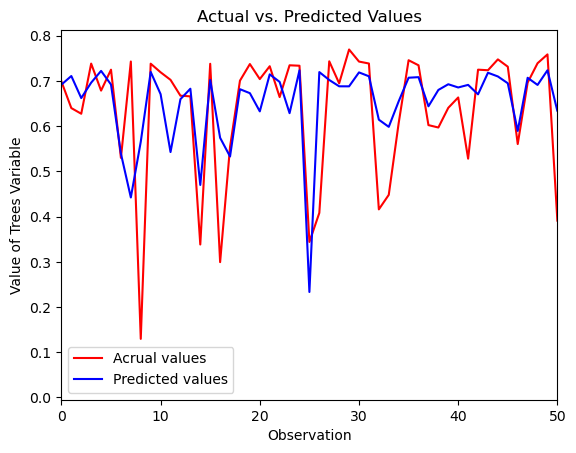

In [53]:
plt.plot(y_test, 
         color = 'red',
         label = 'Acrual values')

plt.plot(y_pred,
         color = 'blue', 
         label = 'Predicted values')

plt.legend()
plt.xlim(0, 50) # change to see everything
plt.title('Actual vs. Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Value of Trees Variable')

plt.show()

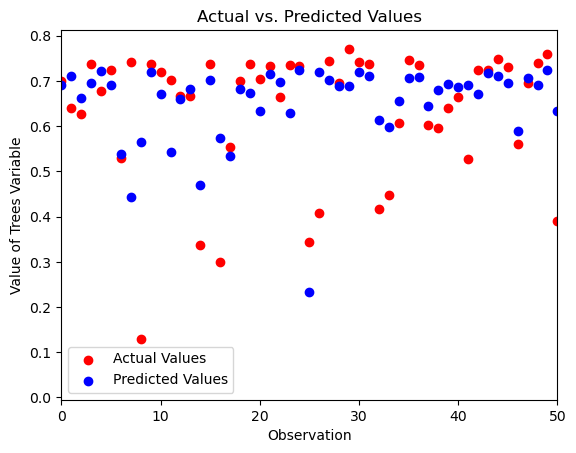

In [54]:
plt.scatter(range(len(y_test)), 
            y_test, 
            color = 'red', 
            label = 'Actual Values')

plt.scatter(range(len(y_pred)),
            y_pred,
            color = 'blue',
            label = 'Predicted Values')

plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlim(0, 50) # change to see everything
plt.xlabel('Observation')
plt.ylabel('Value of Trees Variable')

plt.show()


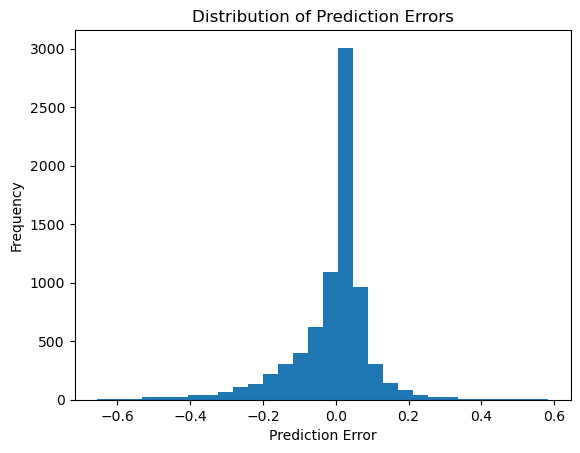

In [55]:
error = y_test - y_pred.flatten()
plt.hist(error, bins = 30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

plt.show()

# stack overflow
# A symmetric and narrow distribution around zero 
# indicates better prediction accuracy.

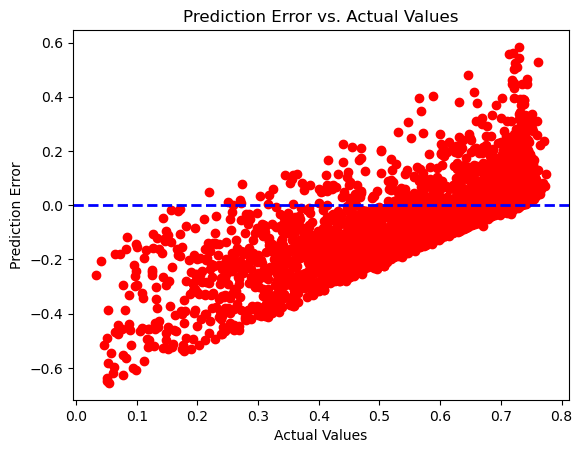

In [56]:
plt.scatter(y_test, error, color = 'red')
plt.axhline(y = 0, 
            color = 'blue',
            linestyle = '--', 
            linewidth = 2)

plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs. Actual Values')

plt.show()


In [ ]:
# do we need to scale the data??